<a href="https://colab.research.google.com/github/dhruv403/Gender-Classification-Algorithm-/blob/main/gender_by_name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-10-be963b7f1c96>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Name"][idx] = re.sub(re.compile("[^a-zA-Z]"),"", data["Name"][idx])


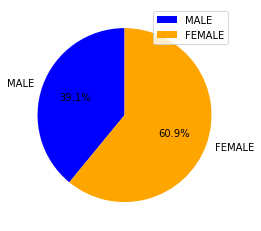

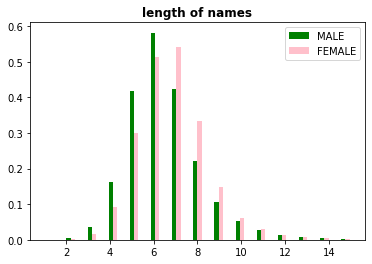

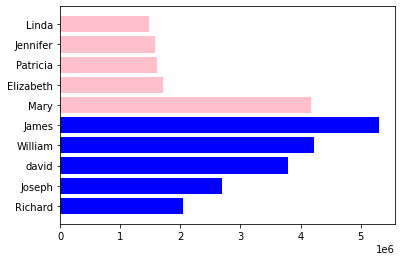

[24.5342909784283, 38.62876239935573, 19.11771529934989, 12.956826551149216, 4.762404771716867]


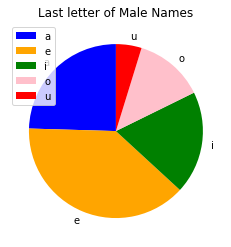

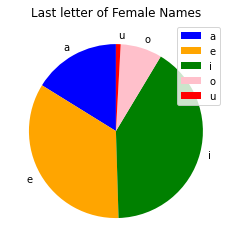

[[3.402765987607569e-187, 1.67319938368103e-145, 1.2412390991133831e-169, 1.5751444423295742e-162, 4.9118731300360436e-192, 7.007672734219986e-135, 1.0880060322507942e-159, 8.573822002171893e-172, 3.424597464324403e-184, 7.945625242499022e-112, 1.0375843579174916e-153, 4.38146343613915e-174, 7.3425088229278715e-155, 1.2684526539910082e-174, 2.7081735093617795e-180, 5.803175973738017e-165, 2.1745346332894014e-48, 7.659281708832789e-185, 1.2838128188790044e-159, 5.180675002272862e-168, 7.510010022600384e-170, 6.048977796168021e-145, 4.521856516338578e-142, 1.04752329567669e-102, 1.3953576829952286e-149, 3.123481938809203e-133], [3.402765987607569e-187, 1.67319938368103e-145, 1.2412390991133831e-169, 1.5751444423295742e-162, 4.9118731300360436e-192, 7.007672734219986e-135, 1.0880060322507942e-159, 8.573822002171893e-172, 3.424597464324403e-184, 7.945625242499022e-112, 1.0375843579174916e-153, 4.38146343613915e-174, 7.3425088229278715e-155, 1.2684526539910082e-174, 2.7081735093617795e-180,

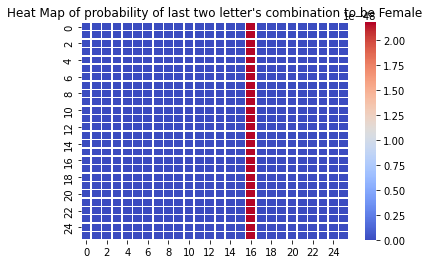

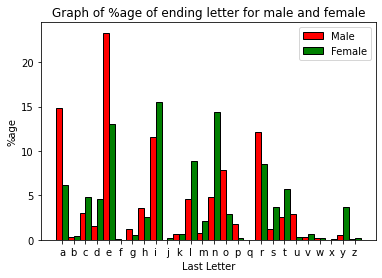

In [ ]:
from matplotlib import pyplot as plt
from os.path import exists
import pandas as pd
import re
import numpy as np
import seaborn as sns

# import pandas as pd
# import io
 
# df = pd.read_csv(io.BytesIO(uploaded['file.csv']))


lastIndexM = []
lastIndexF=[]
sum1=0
sum2=0
for i in range(0,26):
	lastIndexM.append(0)
	lastIndexF.append(0)
	


if exists("trained_data.npy"):
    matrix = np.load("trained_data.npy")
    lastIndexM = np.load("lastIndexM.npy")
    lastIndexF = np.load("lastIndexF.npy")
    heatMapM = np.load("heatMapM.npy")
    heatMapF = np.load("heatMapF.npy")
    lengthF = np.load("lengthF.npy")
    lengthM = np.load("lengthM.npy")
    
else:
    data = pd.read_csv("name_gender_dataset.csv")
    data["Gender"].replace({"F": 0, "M": 1}, inplace=True)
    rows, cols = (26, 26)
    heatMapM = [[0]*cols]*rows
    heatMapF = [[0]*cols]*rows
    lengthF=[]
    lengthM=[]
    for idx in data.index:
        data["Name"][idx] = re.sub(re.compile("[^a-zA-Z]"),"", data["Name"][idx])
    data["Name"] = data["Name"].str.lower()
    matrix = []
    for idx in data.index:
        array = np.zeros(677)
        ch="i"
        for i in range(len(data["Name"][idx])-1):
            index = (ord(data["Name"][idx][i])-97)*26 + (ord(data["Name"][idx][i+1])-97)
            array[index] = 1
            # print("Hello there")
            ch=data["Name"][idx][i]
        array[676] = data[ "Gender"][idx]
        matrix.append(array)
        x=ord(data["Name"][idx][len(data["Name"][idx])-1])-97
        y=ord(data["Name"][idx][len(data["Name"][idx])-2])-97
        if  data[ "Gender"][idx]==1:
          lengthM.append(len(data["Name"][idx]));
          lastIndexM[ord(ch)-97]+=data["Count"][idx]
          heatMapM[x][y]+=data["Count"][idx]
        else:
          lengthF.append(len(data["Name"][idx]));
          heatMapF[x][y]+=data["Count"][idx]
          lastIndexF[ord(ch)-97]+=data["Count"][idx]
    for i in range(0,26):
      for j in range(0,26):
        heatMapF[i][j]=(heatMapF[i][j]*1.0)/(heatMapM[i][j]+heatMapF[i][j])
        
    np.save('trained_data', matrix)
    np.save('lastIndexM', lastIndexM)
    np.save('lastIndexF', lastIndexF)
    np.save('heatMapM', heatMapM)
    np.save('heatMapF', heatMapF)
    np.save('lengthM', lengthM)
    np.save('lengthF', lengthF)

      

# print(lastIndexM)
# print(lastIndexF)

# 3rd screenshot
M = 0
F = 0
data_size = len(matrix)
for array in matrix:
    if array[676] == 1:
        M += 1
    else:
        F += 1
p_m = M/data_size
p_f = F/data_size

# Pie chart for number of male and female
y = np.array([p_m*100,p_f*100])
mylabels = ["MALE", "FEMALE"]
mycolors = ["blue", "orange"]
plt.pie(y, labels = mylabels,autopct='%1.1f%%',startangle = 90,colors = mycolors)
plt.legend()
plt.show()



# ****** Histogram for length of names********
n_bins1 = np.linspace(1,15,30)

  
colors = ['green','pink']
labels = ['MALE','FEMALE']

plt.hist([lengthM, lengthF], n_bins1,density=True, color = colors, label = labels)
  
plt.legend(prop ={'size': 10})
  
plt.title('length of names', fontweight ="bold")
  
plt.show()

#for bar graph for top 5 names in the data set
#Richard,Joseph,David,William,James were the top boys name for 2022 according to https://www.whattoexpect.com/baby-names/list/top-baby-names-for-boys/



x = np.array(["Richard","Joseph","david","William","James"])
y = np.array([2039641, 2695970, 3787547, 4226608,5304407])

plt.barh(x,y,color="blue")

#Mary,Elizabeth,Patricia,Jennifer,Linda were the top girl names

x = np.array(["Mary","Elizabeth","Patricia","Jennifer","Linda"])
y = np.array([4169663, 1704140, 1608260, 1584426,1480592])

plt.barh(x,y,color="pink")


plt.show()



# Pie chart for last letter vowels for both male and female seperately
arrM=[]
sumM=0
for i in range(0,26):
  x = chr(i+97)
  if x=='a' or x=='e' or x=='i' or x=='o' or x=='u':
    arrM.append(lastIndexM[i])
    sumM+=lastIndexM[i]
for i in range(0,5):
  arrM[i]/=sumM
  arrM[i]*=100
print(arrM)


arrF=[]
sumF=0
for i in range(0,26):
  x = chr(i+97)
  if x=='a' or x=='e' or x=='i' or x=='o' or x=='u':
    arrF.append(lastIndexF[i])
    sumF+=lastIndexF[i]
for i in range(0,5):
  arrF[i]/=sumF
  arrF[i]*=100


mylabels = ["a", "e","i","o","u"]
mycolors = ["blue", "orange","green","pink","red"]
plt.pie(arrM, labels = mylabels,startangle = 90,colors = mycolors)
plt.legend("aeiou")
plt.title("Last letter of Male Names")
plt.show()


plt.pie(arrF, labels = mylabels,startangle = 90,colors = mycolors)
plt.legend("aeiou")
plt.title("Last letter of Female Names")
plt.show()

# ******************Heat Map for both male and female*******************************
# ax = sns.heatmap( heatMapM , linewidth = 0.5 , cmap = 'coolwarm' )
  
# plt.title( "2-D Heat Map for last" )
# plt.show()

# for i in range(0,26):
#   for j in range(0,26):
#     heatMapF[i][j]=(heatMapF[i][j]*1.0)/(heatMapM[i][j]+heatMapF[i][j])
print(heatMapF)

ax = sns.heatmap( heatMapF , linewidth = 0.5 , cmap = 'coolwarm' )
  
plt.title( "Heat Map of probability of last two letter's combination to be Female" )
plt.show()

# ------------------------------------------------------
#heatmap for females 
#with x-axis being the last character 
#y-axis being the second last character 

rows, cols = (26, 26)
arr = [[0]*cols]*rows

for idx in data.index:
    if data["Gender"][idx]==0:
        x=ord(data["Name"][idx][len(data["Name"][idx])-1])-97
        y=ord(data["Name"][idx][len(data["Name"][idx])-2])-97
        arr[x][y]+=1
for x in range(26):
    sumx=0
    for y in range(26):
        sumx+=arr[x][y]
    for y in range(26):
        arr[x][y]=(arr[x][y])/sumx;
#print(arr)
ax = sns.heatmap( arr , linewidth = 0.5 , cmap = 'coolwarm' )
  
plt.title( "2-D Heat Map" )
plt.show()




# *****************Graph of last letter frequency both for male and female****************

# Calculating percentage for frequency arrays
for i in range(0,26):
   sum1+=lastIndexM[i]
   sum2+=lastIndexF[i]
for i in range(0,26):
      lastIndexM[i]*=100
      lastIndexF[i]*=100
      lastIndexM[i]=(float)(lastIndexM[i]/sum1)
      lastIndexF[i]/=sum2


# Plotting the bar-graph
n_bins=[]
for i in range(0,26):
	n_bins.append(chr(i+97))

n=26
r = np.arange(n)
width = 0.5
  
  
plt.bar(r, lastIndexM, color = 'r',
        width = width, edgecolor = 'black',
        label='Male')
plt.bar(r + width, lastIndexF, color = 'g',
        width = width, edgecolor = 'black',
        label='Female')
  
plt.xlabel("Last Letter")
plt.ylabel("%age")
plt.title("Graph of %age of ending letter for male and female")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2, n_bins)
plt.legend()
  
plt.show()

# ---------------------------------Taking Input of names to identify their genders-------------------------------------------------------------



name = input("Enter Name: ")
name = re.sub(re.compile("[^a-zA-Z]"),"", name).lower()
for i in range(len(name)-1):
    index = (ord (name[i])-97)*26 + (ord (name[i+1])-97)
    m = 0
    f = 0
    for array in matrix:
        if array[index]==1:
            if array[676]==1:
                m += 1
            else:
                f += 1
    p_m *= m/M
    p_f *= f/F
if p_m >= p_f:
    print("Male")
else:
    print("Female")
print("M", round (p_m/(p_m+p_f), 2))
print("F", round(p_f/(p_m+p_f), 2))




# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving name_gender_dataset.csv to name_gender_dataset.csv
